# Softmax

* `Softmax` : 
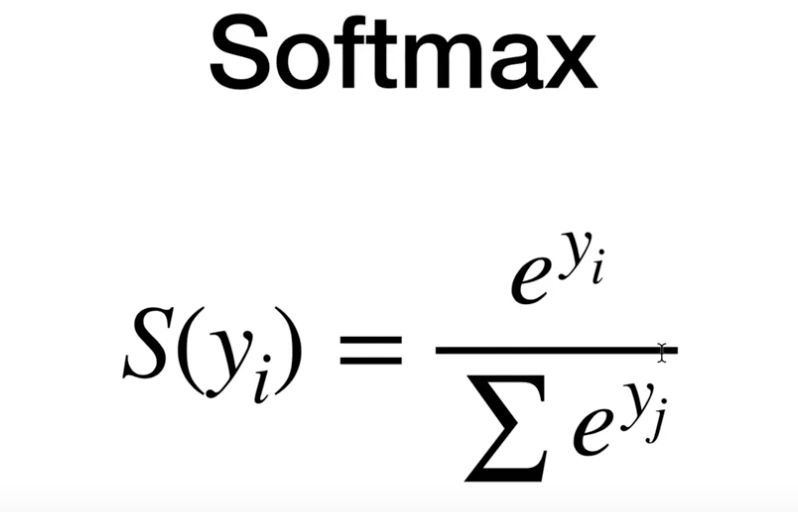
   * `Softmax Layer` : 
   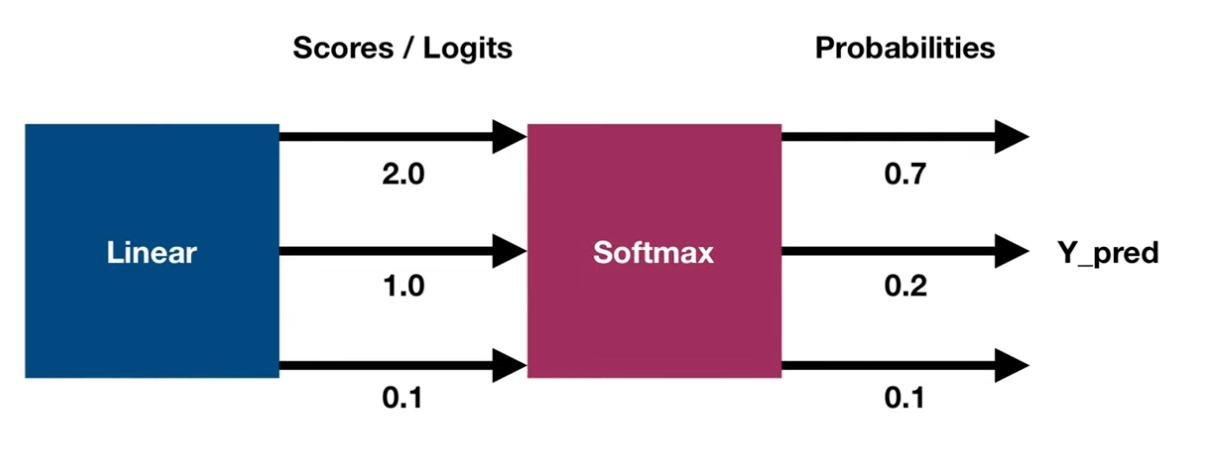

In [1]:
import torch 
import torch.nn as nn
import numpy as np

## numpy Softmax

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [3]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


## pytorch Softmax

In [ ]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print('softmax torch:', outputs) # Almost same. So this works.

# Cross-Entropy Loss

* `Cross-Entropy Loss` : 
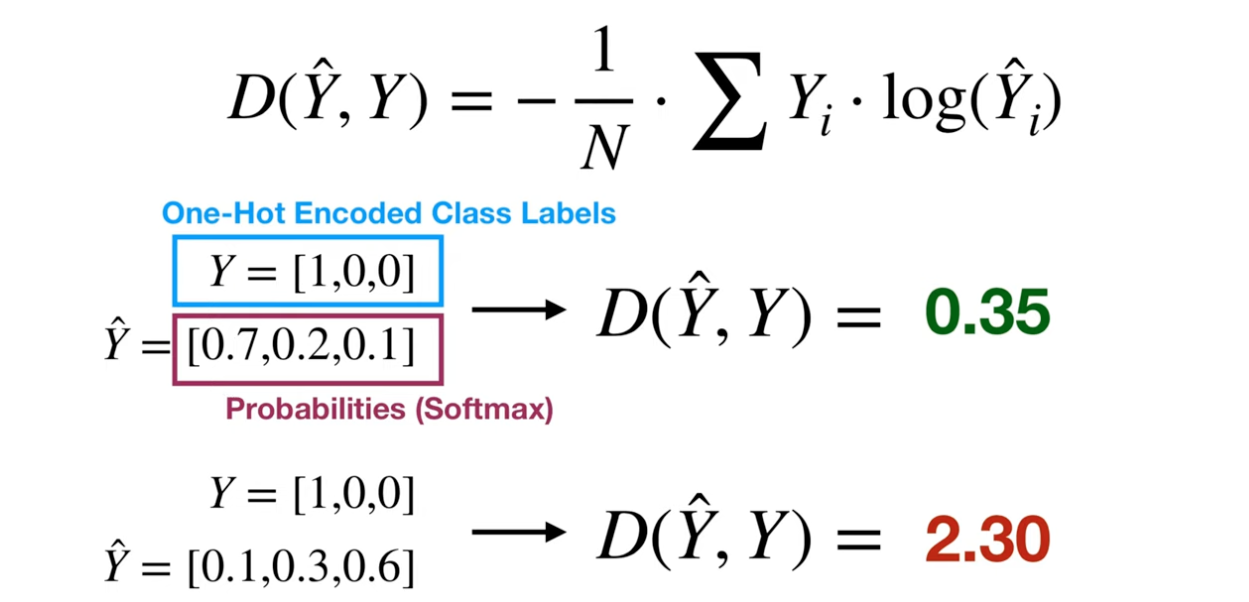

## numpy Cross-Entropy Loss

In [4]:
def cross_entropy(actual, pred) :
    loss = -np.sum(actual * np.log(pred))
    return loss # / float(pred.shape[0])

In [6]:
Y = np.array([1, 0, 0])

# y_pred has probabilities, not actual class labels
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

loss1 = cross_entropy(Y, Y_pred_good)
loss2 = cross_entropy(Y, Y_pred_bad)

print(f"Loss1 numpy: {loss1:.4f} (good prediction)")
print(f"Loss2 numpy: {loss2:.4f} (bad prediction)")

Loss1 numpy: 0.3567 (good prediction)
Loss2 numpy: 2.3026 (bad prediction)


## pytorch Cross-Entropy Loss

In [12]:
import torch.nn as nn

loss = nn.CrossEntropyLoss() # nn.CrossEntropyLoss applies nn.LogSoftmax + nn.NLLLoss

# Be careful!!!!!!!!!!!!!!
# Y has class labels, not One-Hot encoded vector
# 4 samples
Y = torch.tensor([2, 0, 1, 0]) # actual label : only put the correct class label
# Y_pred has raw scores(logits), no Softmax!
# n_samples x n_classes = 4 x 3
Y_pred_good = torch.tensor([[0.1, 0.2, 2.1], [1.0, 0.5, 0.2], [0.5, 3.0, 2.0], [2.8, 0.2, 0.1]]) # raw scores(logits) no softmax in last layer
Y_pred_bad = torch.tensor([[0.1, 2.2, 0.1], [0.0, 0.5, 1.2], [3.5, 0.0, 2.0], [0.8, 0.2, 2.1]]) # raw scores(logits) no softmax in last layer

loss1 = loss(Y_pred_good, Y)
loss2 = loss(Y_pred_bad, Y)
print(f"Loss1 torch: {loss1.item():.4f} (good prediction)")
print(f"Loss2 torch: {loss2.item():.4f} (bad prediction)")

pred1_value, pred1_class = torch.max(Y_pred_good, 1) # torch.max returns (maximum value, maximum index)
pred2_value, pred2_class = torch.max(Y_pred_bad, 1)
print(f"pred1_value: {pred1_value}, pred1_class: {pred1_class}")
print(f"pred2_value: {pred2_value}, pred2_class: {pred2_class}")


Loss1 torch: 0.3688 (good prediction)
Loss2 torch: 2.3709 (bad prediction)
pred1_value: tensor([2.1000, 1.0000, 3.0000, 2.8000]), pred1_class: tensor([2, 0, 1, 0])
pred2_value: tensor([2.2000, 1.2000, 3.5000, 2.1000]), pred2_class: tensor([1, 2, 0, 2])


# Multiclass Problem (Which Animal?)

* `Not Classification. Which Animal?` <br>
-> Use nn.CrossEntropyLoss() `No Softmax at the end!`

* `Binary Classification. Is it a dog?` <br>
-> Use `Sigmoid()`


In [18]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): # 28*28, 5, 3
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # (applies Softmax)

In [20]:
# Binary Classification problem
class NeuralNeta(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): # 28*28, 5, 3
        super(NeuralNeta, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return out
    
model = NeuralNeta(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.BCELoss() # Bincary Classification Entropy Loss